![](itd.png)

    
# Análisis de Datos Masivos
## Visualización de Datos 1

## Nombree del docente
### José Gabriel Rodriguez Rivas
## Nombre del alumno
### Calos Alberto Carrete Gómez

In [20]:
import pandas as pd
import numpy as np

### Paso 1: Carga, Limpieza y Transformación de Datos 

In [43]:
df_canada = pd.read_excel('Canada.xlsx', 
                     sheet_name='Canada by Citizenship',
                     skiprows = range(20), 
                     skipfooter=2)  
df_canada

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [44]:
print(df_canada.shape) #Muestra columnas y renglones

(195, 43)


In [45]:
df_canada.drop(['AREA','REG','DEV','Type','Coverage'],axis=1, inplace=True)
df_canada.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [46]:
df_canada.rename(columns={'OdName':'Country',
                         'AreaName':'Continent',
                         'RegName':'Region'},inplace=True)

In [47]:
#Verificar que todas las columnas sean de tipo String
all(isinstance(column,str) for column in df_canada.columns )

False

In [48]:
#Cambiar todas las columnas a tipo String 
df_canada.columns = list(map(str,df_canada.columns))

In [49]:
#Se vuelve a verificar
all(isinstance(column,str) for column in df_canada.columns )

True

In [50]:
df_canada.set_index('Country',inplace=True)
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [51]:
#Se agrega la columna total sumando la inmigración de todos los años por paises
df_canada['Total'] = df_canada.sum(axis=1)
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [52]:
years = list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Parte 2: Visualización de datos con matplotlib

In [53]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

#### Gráficos de área

In [54]:
df_canada.sort_values(['Total'],ascending=False,axis=0,inplace=True)
df_canada.head(10)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [55]:
df_top5 = df_canada.head()
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [56]:
#Trasponer renglones y columnas
df_top5 = df_top5[years].transpose()
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [57]:
df_top5.index = df_top5.index.map(int)
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


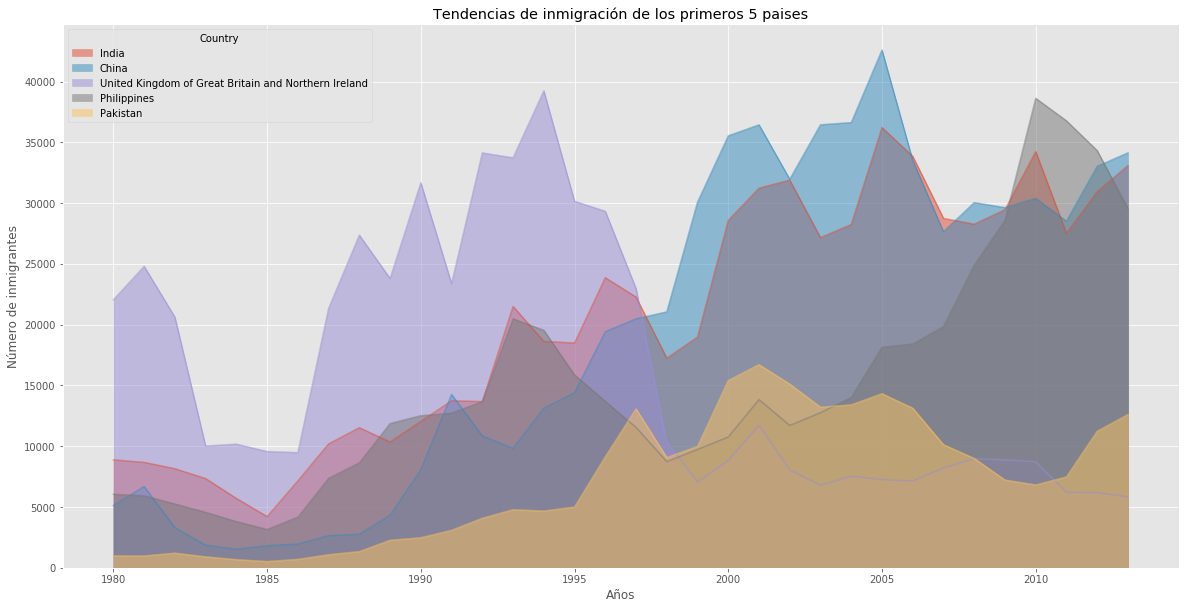

In [58]:
df_top5.plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Tendencias de inmigración de los primeros 5 paises')
plt.ylabel('Número de inmigrantes')
plt.xlabel('Años')
plt.show()

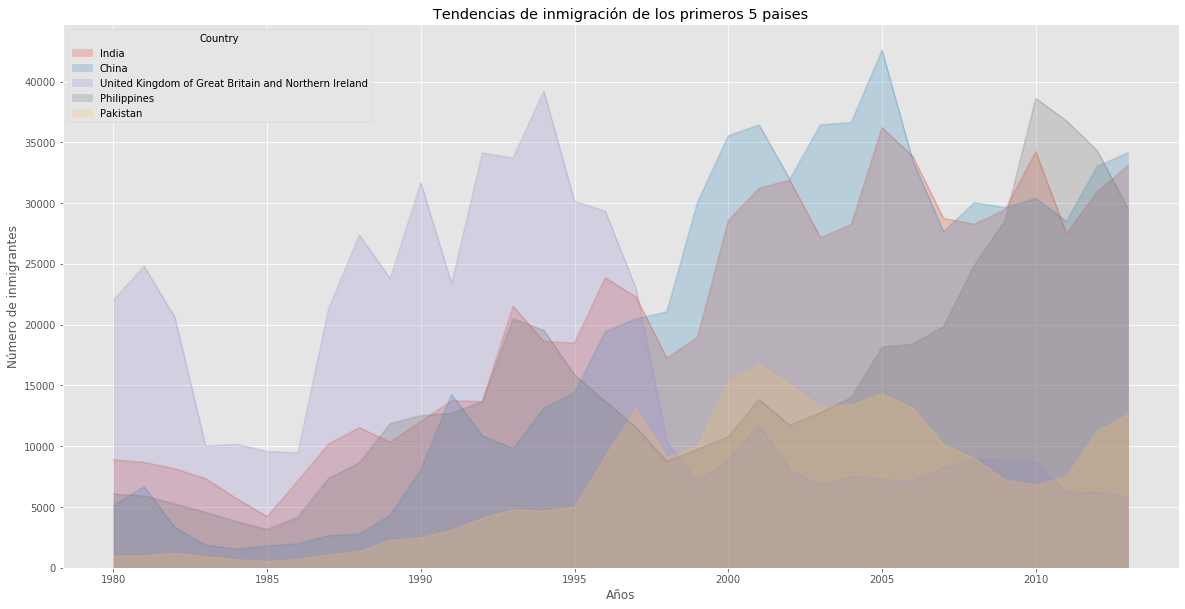

In [59]:
#Transparencia
df_top5.plot(kind='area', alpha=0.25, stacked=False,figsize=(20,10))
plt.title('Tendencias de inmigración de los primeros 5 paises')
plt.ylabel('Número de inmigrantes')
plt.xlabel('Años')
plt.show()

Text(0.5, 0, 'Años')

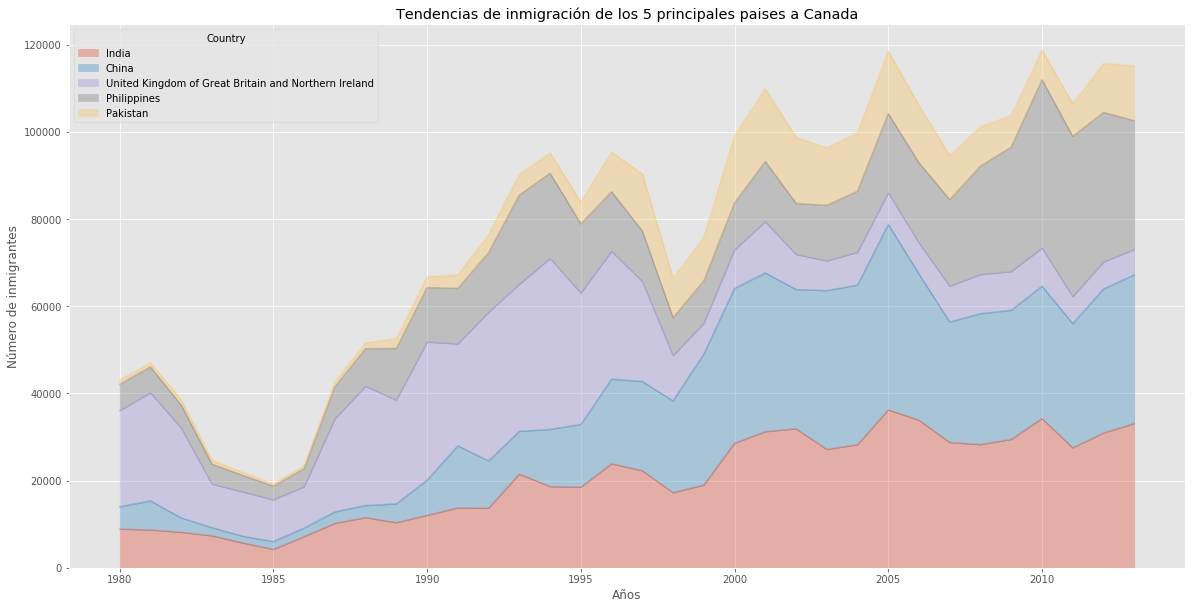

In [60]:
ax = df_top5.plot(kind='area',alpha=0.35,figsize=(20,10))
ax.set_title('Tendencias de inmigración de los 5 principales paises a Canada')
ax.set_ylabel('Número de inmigrantes')
ax.set_xlabel('Años')

### Gráfica de barras

In [71]:
df_chile = df_canada.loc['Chile',years]
df_chile.head()

1980    1233
1981    1069
1982    1078
1983     781
1984     681
Name: Chile, dtype: object

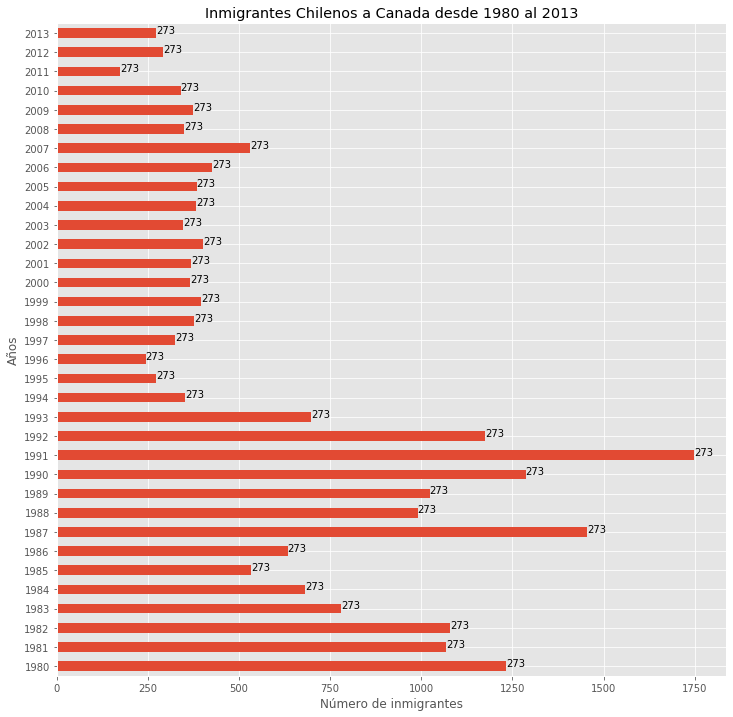

In [78]:
#En los diagramas de barra el eje X se usa para etiquetar y la longitud de la barra corresponde al valor de la variable
#Se puede poner barra horizontal con barh
df_chile.plot(kind='barh',figsize=(12,12))
plt.xlabel('Número de inmigrantes')
plt.ylabel('Años')
plt.title('Inmigrantes Chilenos a Canada desde 1980 al 2013')
for index, value in enumerate(df_chile):
    #plt.text(value, index, str(value)) es una forma para mostrar los valores o también la que se encuentra a 
    #continuación
    plt.annotate(label,xy=(value,index), color='black')
plt.show()

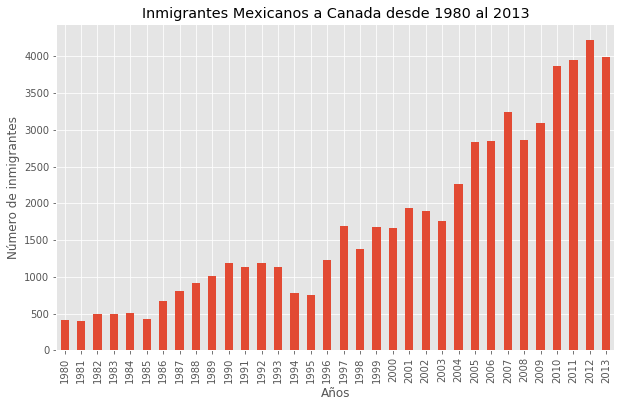

In [73]:
#En los diagramas de barra el eje X se usa para etiquetar y la longitud de la barra corresponde al valor de la variable
#Se puede poner barra horizontal con barh
df_mexico = df_canada.loc['Mexico',years]
df_mexico.plot(kind='bar',figsize=(10,6))
plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')
plt.title('Inmigrantes Mexicanos a Canada desde 1980 al 2013')
plt.show()

### Gráficos Circulares

In [84]:
df_continentes = df_canada.groupby('Continent',axis=0).sum()
df_continentes

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


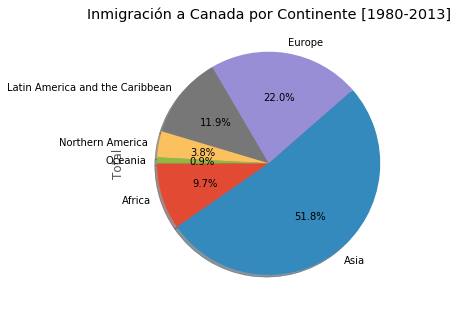

In [95]:
df_continentes['Total'].plot(kind='pie', figsize=(5,6), autopct='%1.1f%%', startangle=180,shadow=True)
plt.title("Inmigración a Canada por Continente [1980-2013]")
plt.show()


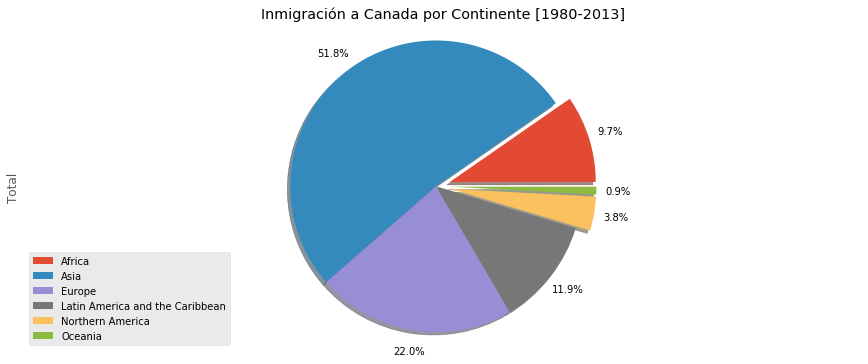

In [96]:
explode_list = [0.1,0,0,0, 0.1,0.1]

df_continentes['Total'].plot(kind='pie', figsize=(15,6), autopct='%1.1f%%', startangle=0,shadow=True, labels=None,
                            pctdistance=1.15,explode=explode_list)
plt.title("Inmigración a Canada por Continente [1980-2013]")
plt.axis('equal')
plt.legend(labels=df_continentes.index,loc='lower left')
plt.show()
